In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir('/content/gdrive/My Drive/MA')
print(os.listdir(os.getcwd()))
import json
import pandas as pd
import gzip
import numpy as np
import sys
import matplotlib.pyplot as plt
import time
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.utils import Sequence
from sklearn.metrics import log_loss, roc_auc_score, confusion_matrix

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['SIG Proceedings Template-Jan2015 Zip', '.DS_Store', 'we_data.zip', 'sig-proceedings-template-may2015-zip.zip', 'data', 'click_predictions', 'bid_predictions', 'payprice_predictions', 'Click Prediction Grid Search.gsheet', 'Payprice_Prediction.ipynb', 'Click_Prediction.ipynb', 'data2', 'League_of_Agents.ipynb', 'MA_Feature_Engineering.ipynb', 'Data_Preprocessing.ipynb']


In [0]:
# all_AUC={}

In [0]:
##############################################################################
for ds_rate in [0.0025]:
  folder='data/halffeatures/'+str(ds_rate)+'/'
  trainset='train_'+str(ds_rate)
  validationset='validation_'+str(ds_rate)
  dic=json.loads(open(folder+'dic_'+str(ds_rate)+'.json','r').read())
  n_features=len(dic.keys())
  print(n_features)
  model = keras.Sequential([
#       keras.layers.Dense(1, input_shape=(n_features,),activation=tf.nn.sigmoid)
      keras.layers.Dense(2250, input_shape=(n_features,),activation=tf.nn.relu),
#       keras.layers.Dense(1800, activation=tf.nn.relu),
      keras.layers.Dense(450, activation=tf.nn.relu),
      keras.layers.Dense(90, activation=tf.nn.relu),
      keras.layers.Dense(18, activation=tf.nn.relu),
      keras.layers.Dense(1, activation=tf.nn.sigmoid)
  ])
  model.compile(optimizer='adam',loss='binary_crossentropy')
  n_epochs=10
  ##############################################################################

  train_files_x=[file for file in os.listdir(folder) if trainset+'_x' in file]
  n_train_files=len(train_files_x)
  validation_files_x=[file for file in os.listdir(folder) if validationset+'_x' in file]
  n_validation_files=len(validation_files_x)
  train_labels=np.fromfile(folder+trainset+'_click.bin',dtype=bool)
  validation_labels=np.fromfile(folder+validationset+'_click.bin',dtype=bool)

  AUC=[]
  for epoch in range(n_epochs):
    j=0
    for i in range(n_train_files):
      print(trainset,'step',i,'/',n_train_files)
      x=np.fromfile(folder+train_files_x[i],dtype=bool)
      x=x.reshape(int(len(x)/n_features),n_features)
      model.fit(x,train_labels[j:j+len(x)],batch_size=100,epochs=1)
      j+=len(x)
    print(trainset,'epoch',epoch+1,'is finished')

    if (epoch+1)%1==0:
      validation_predictions=np.zeros(0)
      for i in range(n_validation_files):
        print('step',i,'/',n_validation_files)
        validation_x=np.fromfile(folder+validation_files_x[i],dtype=bool)
        validation_x=validation_x.reshape(int(len(validation_x)/n_features),n_features)
        validation_predictions=np.append(validation_predictions,model.predict(validation_x).squeeze())
      AUC.append(roc_auc_score(validation_labels, validation_predictions))
      print(trainset,'epoch',epoch+1,'validation set AUC:',AUC[-1])
      print(AUC)
      if len(AUC)>1 and AUC[-1]<AUC[-2]:
        break
#   all_AUC['mlp4_2250'+str(ds_rate)]=AUC


3460
train_0.0025 step 0 / 1
7865/7865 [==============================] - 19s 2ms/sample - loss: 0.4280
train_0.0025 epoch 1 is finished
step 0 / 2
step 1 / 2
train_0.0025 epoch 1 validation set AUC: 0.86694050920486
[0.86694050920486]
train_0.0025 step 0 / 1
7865/7865 [==============================] - 16s 2ms/sample - loss: 0.2760
train_0.0025 epoch 2 is finished
step 0 / 2
step 1 / 2
train_0.0025 epoch 2 validation set AUC: 0.873083914756486
[0.86694050920486, 0.873083914756486]
train_0.0025 step 0 / 1
7865/7865 [==============================] - 16s 2ms/sample - loss: 0.1758
train_0.0025 epoch 3 is finished
step 0 / 2
step 1 / 2
train_0.0025 epoch 3 validation set AUC: 0.8548679941333986
[0.86694050920486, 0.873083914756486, 0.8548679941333986]


In [0]:
for i in range(20000,100000,10000):
  print(i,':',np.sum(validation_labels[np.flip(np.argsort(validation_predictions),axis=0)[:i]]))

20000 : 115
30000 : 127
40000 : 137
50000 : 145
60000 : 150
70000 : 153
80000 : 157
90000 : 164


In [0]:
for i in range(20000,100000,10000):
  print(i,':',np.sum(validation_labels[np.flip(np.argsort(validation_predictions),axis=0)[:i]]))

20000 : 120
30000 : 132
40000 : 141
50000 : 151
60000 : 153
70000 : 156
80000 : 164
90000 : 169


In [0]:
for i in range(20000,100000,10000):
  print(i,':',np.sum(validation_labels[np.flip(np.argsort(validation_predictions),axis=0)[:i]]))

20000 : 112
30000 : 127
40000 : 136
50000 : 144
60000 : 148
70000 : 154
80000 : 159
90000 : 166


In [0]:
print(confusion_matrix(validation_labels,validation_predictions>0.5))
print(confusion_matrix(validation_labels,validation_predictions>0.1))
print(confusion_matrix(validation_labels,validation_predictions>0.01))
print(confusion_matrix(validation_labels,validation_predictions>0.001))

[[300775   2948]
 [   116     86]]
[[269515  34208]
 [    69    133]]
[[131599 172124]
 [    16    186]]
[[ 33822 269901]
 [     2    200]]


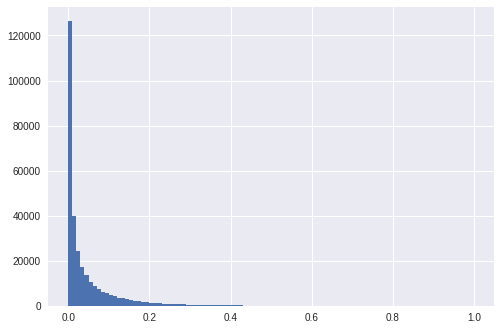

In [0]:
h=plt.hist(validation_predictions,bins=100)

In [0]:
print(confusion_matrix(validation_labels,validation_predictions>0.5))
print(confusion_matrix(validation_labels,validation_predictions>0.1))
print(confusion_matrix(validation_labels,validation_predictions>0.01))
print(confusion_matrix(validation_labels,validation_predictions>0.001))

[[302173   1550]
 [   129     73]]
[[260089  43634]
 [    64    138]]
[[126408 177315]
 [    13    189]]
[[ 39882 263841]
 [     2    200]]


In [0]:
validation_predictions[:10]

array([1.61954761e-03, 3.40589881e-03, 5.33977151e-03, 3.43236327e-03,
       4.35411930e-04, 1.04148388e-02, 5.12182713e-04, 3.27728987e-02,
       7.07864761e-04, 5.36441803e-07])

In [0]:
folder='data/halffeatures/'+str(ds_rate)+'/'
testset='test_'+str(ds_rate)
test_files_x=[file for file in os.listdir(folder) if testset+'_x' in file]
n_test_files=len(test_files_x)

test_predictions=np.zeros(0)
for i in range(n_test_files):
  print('step',i,'/',n_test_files)
  test_x=np.fromfile(folder+test_files_x[i],dtype=bool)
  test_x=test_x.reshape(int(len(test_x)/n_features),n_features)
  test_predictions=np.append(test_predictions,model.predict(test_x).squeeze())
test_predictions=test_predictions.astype(float)
test_predictions.tofile('click_predictions/'+'test_predictions_0877.bin')  

step 0 / 3
step 1 / 3
step 2 / 3


In [0]:
# folder='data/'+str(ds_rate)+'/'
# validationset='validation_'+str(ds_rate)
# validation_files_x=[file for file in os.listdir(folder) if validationset+'_x' in file]
# n_validation_files=len(validation_files_x)

# validation_predictions=np.zeros(0)
# for i in range(n_validation_files):
#   print('step',i,'/',n_validation_files)
#   validation_x=np.fromfile(folder+validation_files_x[i],dtype=bool)
#   validation_x=validation_x.reshape(int(len(validation_x)/n_features),n_features)
#   validation_predictions=np.append(validation_predictions,model.predict(validation_x).squeeze())
validation_predictions=validation_predictions.astype(float)
validation_predictions.tofile('click_predictions/'+'validation_predictions_0877.bin')  

In [0]:
dic=json.loads(open('data/minimalfeatures/0.01/dic_0.01.json','r').read())
n_features=len(dic.keys())
print(dic)

{'weekday_0': 0, 'weekday_1': 1, 'weekday_2': 2, 'weekday_3': 3, 'weekday_4': 4, 'weekday_5': 5, 'weekday_6': 6, 'hour_0': 7, 'hour_1': 8, 'hour_2': 9, 'hour_3': 10, 'hour_4': 11, 'hour_5': 12, 'hour_6': 13, 'hour_7': 14, 'hour_8': 15, 'hour_9': 16, 'hour_10': 17, 'hour_11': 18, 'hour_12': 19, 'hour_13': 20, 'hour_14': 21, 'hour_15': 22, 'hour_16': 23, 'hour_17': 24, 'hour_18': 25, 'hour_19': 26, 'hour_20': 27, 'hour_21': 28, 'hour_22': 29, 'hour_23': 30, 'region_0': 31, 'region_1': 32, 'region_2': 33, 'region_3': 34, 'region_15': 35, 'region_27': 36, 'region_40': 37, 'region_55': 38, 'region_65': 39, 'region_79': 40, 'region_80': 41, 'region_94': 42, 'region_106': 43, 'region_124': 44, 'region_134': 45, 'region_146': 46, 'region_164': 47, 'region_183': 48, 'region_201': 49, 'region_216': 50, 'region_238': 51, 'region_253': 52, 'region_275': 53, 'region_276': 54, 'region_298': 55, 'region_308': 56, 'region_325': 57, 'region_333': 58, 'region_344': 59, 'region_359': 60, 'region_368': 61